# Image Classification

In [1]:
# fmnist dataset image classification using CNN architecture

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# check the version of tensor flow
print("Tensor Flow Version:", tf.__version__)

Tensor Flow Version: 2.13.0


In [3]:
# load the dataset fmnist
fasion_mnist= tf.keras.datasets.fashion_mnist.load_data()

In [4]:
(x_train, y_train), (x_test, y_test) = fasion_mnist



In [5]:
print("Training data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)


Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


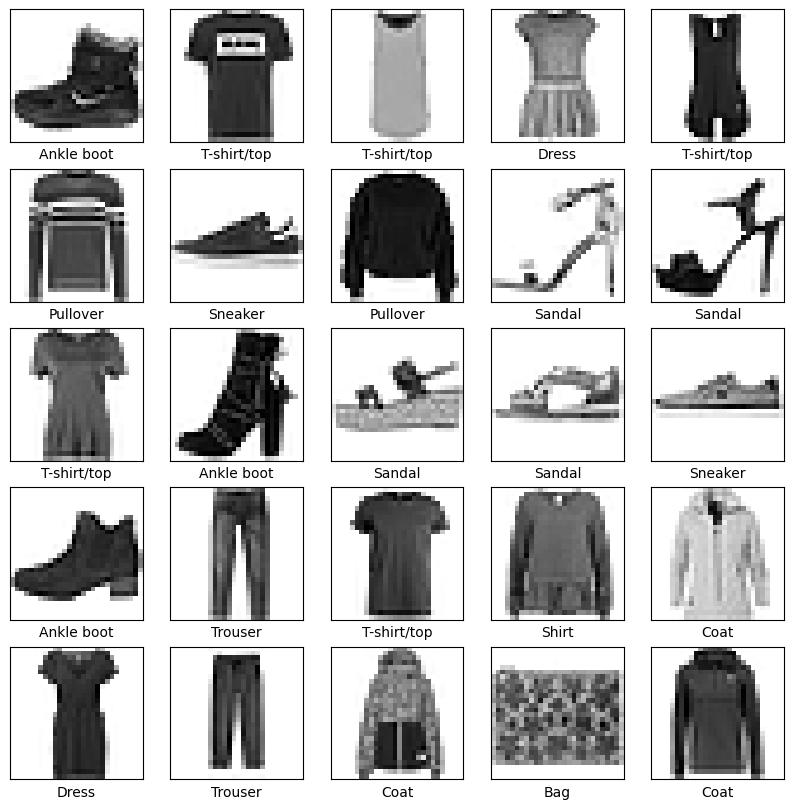

In [7]:
# display some sample images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [8]:
# Display the class labels for the training dataset
for i in range(10):
    print(f"Image {i}: Class label - {class_names[y_train[i]]}")


Image 0: Class label - Ankle boot
Image 1: Class label - T-shirt/top
Image 2: Class label - T-shirt/top
Image 3: Class label - Dress
Image 4: Class label - T-shirt/top
Image 5: Class label - Pullover
Image 6: Class label - Sneaker
Image 7: Class label - Pullover
Image 8: Class label - Sandal
Image 9: Class label - Sandal


In [10]:
len(x_train)

60000

In [22]:
train_image = x_train.copy()
test_image = y_train.copy()

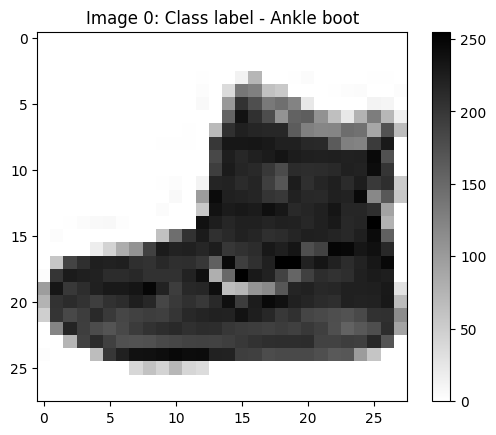

In [ ]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.title(f"Image 0: Class label - {class_names[y_train[0]]}")
plt.grid(False)  
plt.show()


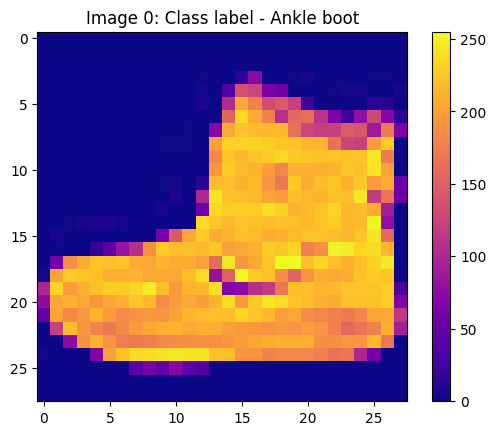

In [14]:
plt.imshow(x_train[0], cmap='plasma')  # Using 'plasma' colormap for yellow-purple color
plt.colorbar()
plt.title(f"Image 0: Class label - {class_names[y_train[0]]}")
plt.grid(False)  
plt.show()


In [21]:
# Display the pixel values of the first image
print("Pixel values of the first image:")
for row in train_image[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

Pixel values of the first image:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3 
  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15 
  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66 
  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232

In [23]:
train_image= train_image/255.0
test_image= test_image/255.0

In [24]:
# Display the pixel values of the first image
print("Pixel values of the first image:")
for row in train_image[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()



Pixel values of the first image:
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00392156862745098 0.0 0.0 0.050980392156862744 0.28627450980392155 0.0 0.0 0.00392156862745098 0.01568627450980392 0.0 0.0 0.0 0.0 0.00392156862745098 0.00392156862745098 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.011764705882352941 0.0 0.1411764705882353 0.5333333333333333 0.4980392156862745 0.24313725490196078 0.21176470588235294 0.0 0.0 0.0 0.00392156862745098 0.011764705882352941 0.01568627450980392 0.0 0.0 0.011764705882352941 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.023529411764705882 0.0 0.4 0.8 0.6901960784313725 0.5254901960784314 0.56470588

In [26]:
# round up each pixel values to 3 decimal places
train_image = np.round(train_image, 3)
test_image = np.round(test_image, 3)

# Display the pixel values of the first image
print("Pixel values of the first image:")
for row in train_image[0]:
    for pixel in row:
        print("{:0.3}".format(pixel), end=" ")
    print()

Pixel values of the first image:
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.004 0.0 0.0 0.051 0.286 0.0 0.0 0.004 0.016 0.0 0.0 0.0 0.0 0.004 0.004 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.012 0.0 0.141 0.533 0.498 0.243 0.212 0.0 0.0 0.0 0.004 0.012 0.016 0.0 0.0 0.012 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.024 0.0 0.4 0.8 0.69 0.525 0.565 0.482 0.09 0.0 0.0 0.0 0.0 0.047 0.039 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.608 0.925 0.812 0.698 0.42 0.612 0.631 0.427 0.251 0.09 0.302 0.51 0.282 0.059 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.004 0.0 0.271 0.812 0.875 0.855 0.847 0.847 0.639 0.498 0

<Figure size 640x480 with 0 Axes>

<Axes: >

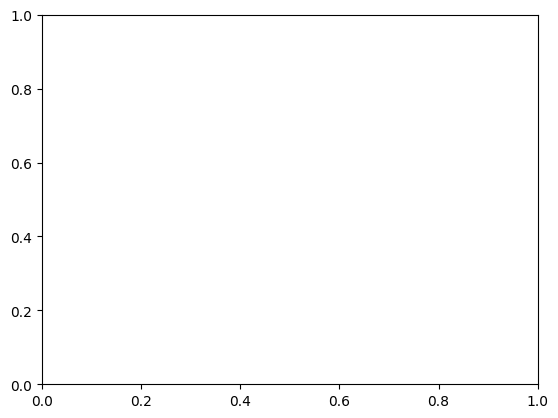

In [31]:
train_image = x_train.copy()
test_image = x_test.copy()  # Corrected from y_train to x_test

 # Reshape the image to 28x28 to have a channel dimension
x_train = train_image.reshape(-1, 28, 28, 1)
x_test = test_image.reshape(-1, 28, 28, 1)
# Display the complete output of the cell
display(plt.gcf())
display(plt.gca())

In [35]:
# create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)), # input layer
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)), # pooling layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax") # output layers
])
# compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# now train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4709 - accuracy: 0.8351 - val_loss: 0.3548 - val_accuracy: 0.8773
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3320 - accuracy: 0.8839 - val_loss: 0.3357 - val_accuracy: 0.8810
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2920 - accuracy: 0.8978 - val_loss: 0.2992 - val_accuracy: 0.8970
Epoch 4/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2688 - accuracy: 0.9053 - val_loss: 0.2813 - val_accuracy: 0.9016
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2493 - accuracy: 0.9120 - val_loss: 0.2923 - val_accuracy: 0.8967
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2345 - accuracy: 0.9169 - val_loss: 0.2768 - val_accuracy: 0.9035
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2203 - accuracy: 0.9215 - val_loss: 0.2626 - val_ac

In [39]:
# model evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 - 1s - loss: 72.5528 - accuracy: 0.8366 - 718ms/epoch - 2ms/step
Test Loss: 72.5528
Test Accuracy: 0.8366


In [40]:
model.save('image_classification_model.h5')


c:\Users\talim\miniconda3\envs\tf_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Make prediction

In [41]:
test_image.shape

(10000, 28, 28)

In [42]:
prediction=model.predict(test_image)

313/313 [==============================] - 1s 2ms/step


In [43]:
prediction[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [46]:
np.argmax(prediction[50])

4